In [14]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score


In [16]:
import ipywidgets as widgets
import io 
from PIL import Image
import tqdm 
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Train Test Split Folder path


In [17]:
x_train = []
y_train = []

image_size = 150

labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size,image_size))
        x_train.append(img)
        y_train.append(i)
        
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size,image_size))
        x_train.append(img)
        y_train.append(i)
    
x_train = np.array(x_train) 
y_train = np.array(y_train)
    

In [18]:
x_train,y_train = shuffle(x_train, y_train,random_state = 101)
x_train.shape

(3264, 150, 150, 3)

Train Test Split Training

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.1, random_state = 101)

In [20]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [21]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(256, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation = 'softmax'))



In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [24]:
history = model.fit(x_train,y_train,epochs=20,validation_split =0.1)

Epoch 1/20


I0000 00:00:1730782725.315931     107 service.cc:145] XLA service 0x7e9cf0015b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730782725.315993     107 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 5/83 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2303 - loss: 12.9608

I0000 00:00:1730782739.227318     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 33s 198ms/step - accuracy: 0.3062 - loss: 3.4841 - val_accuracy: 0.5000 - val_loss: 1.1614
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4988 - loss: 1.1545 - val_accuracy: 0.5748 - val_loss: 1.0203
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5868 - loss: 0.9619 - val_accuracy: 0.6020 - val_loss: 0.8479
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6401 - loss: 0.8449 - val_accuracy: 0.7381 - val_loss: 0.6577
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6677 - loss: 0.7886 - val_accuracy: 0.7041 - val_loss: 0.6692
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7544 - loss: 0.6418 - val_accuracy: 0.7925 - val_loss: 0.5648
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7939 - loss: 0.5475 - val_accuracy: 0.7721 - val_loss: 0.5339
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8148 - loss: 0.5127 - val_accuracy: 0.7993 - val_loss: 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

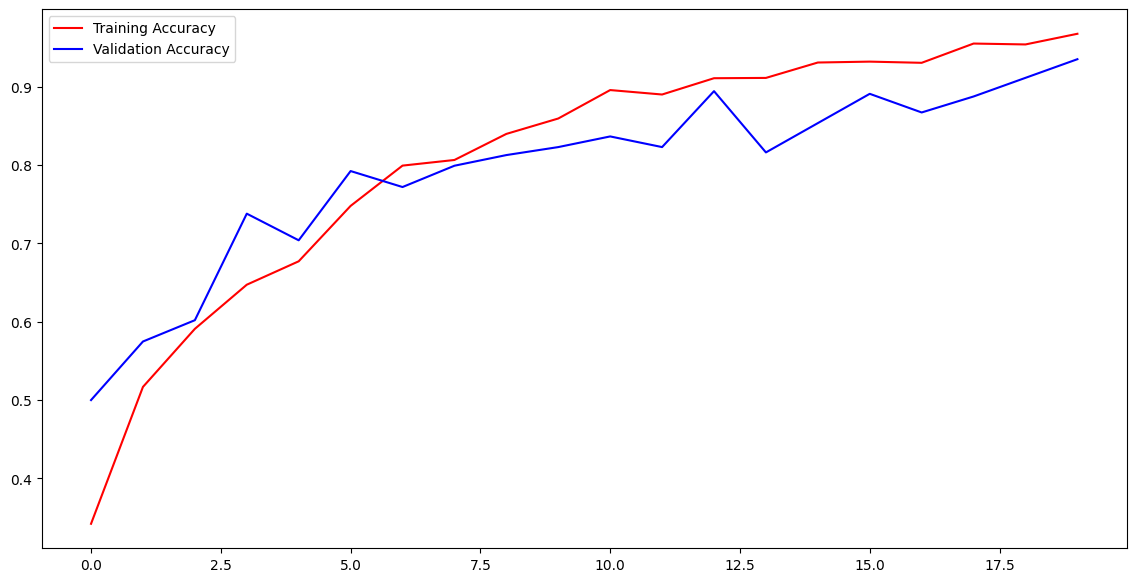

In [26]:
model.save('brain_afmtumor.h5')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc,'r', label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b', label = 'Validation Accuracy')
plt.legend(loc='upper left')
plt.show()


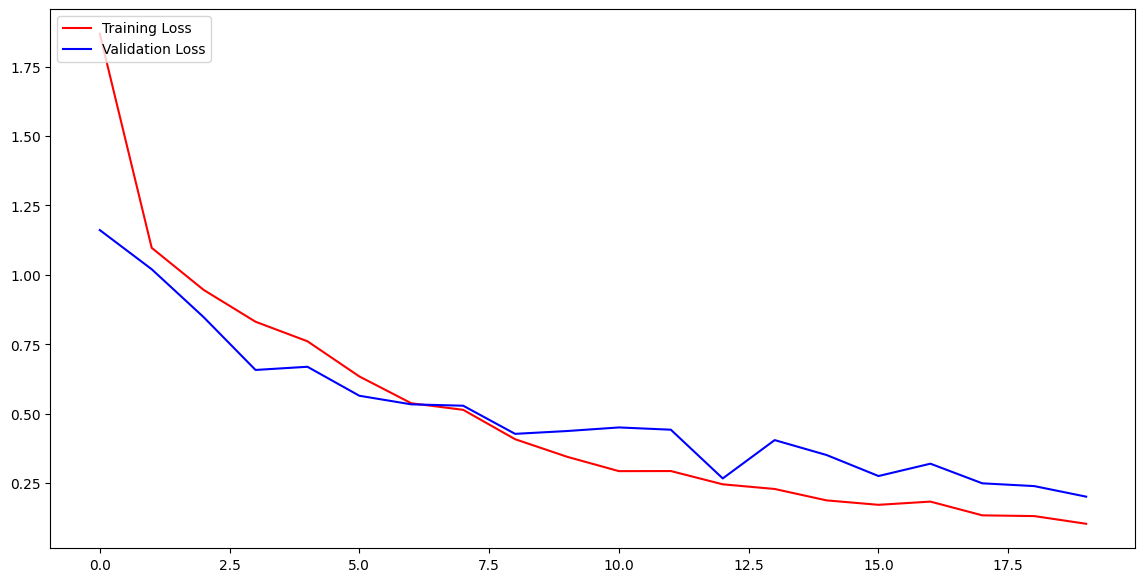

In [27]:
model.save('brain_afmtumor.h5')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,loss,'r', label = 'Training Loss')
plt.plot(epochs,val_loss,'b', label = 'Validation Loss')
plt.legend(loc='upper left')
plt.show()


Prediction

In [28]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [29]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

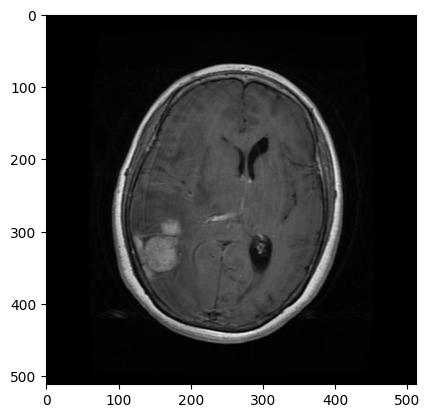

In [30]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (107).jpg')
plt.imshow(img)

In [33]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


1